#  支持向量机(SVM)
## 1 算法简介

支持向量机SVM(Support Vector Machine)从线性可分情况下的最优分类面问题发展而来。如下图所示的一个二分类问题，假设图中空心圆点是数据A,×型的点是数据B，我们需要找一条曲线，将A和B成两类:
<img src="./img/fig1.png" width = "600" height = "400" alt="fig1" align=center />

观察可知，图中实线直线是符合要求的曲线之一，这样可以用直线实现的二分类问题，也被称为线性可分的二分类问题。在本问题中，经过实线且垂直于数据点所在平面的平面被称为分类面，实线也被称为分类线。

最优分类面就是要求分类线不但能将AB两类数据点正确分开,且使分类间隔最大（在图中直观体现就是虚线之间的间隔最大）。

SVM解决线性可分的二分类问题的思路是这样的，寻找一个满足分类要求的分类面，并且待分类的数据点距离分类面尽可能的远，也就是寻找一个分类面使它两侧距离数据点的空白区域最大。过两类样本中离分类面最近的点且平行于最优分类面的超平面上的数据样本就叫做支持向量（图中虚线经过的空心圆数据点或×型数据点）。

>**注意:**更多关于[超平面](https://baike.baidu.com/item/%E8%B6%85%E5%B9%B3%E9%9D%A2/5360532?fr=aladdin)的知识，请查阅相关书籍。简单的理解，超平面即比所在的空间维度要低一个维度，三维空间里超平面为一个平面，二维空间里的超平面为一条直线，一维空间里超平面为数轴上的一个点。

以上用以处理线性可分的情况的分类器就是最初的SVM，这样的分类器还是一个弱分类器。在现实问题中，还有一些线性不可分的问题。如下图所示的数据点，如果我们想要将红色的数据点和蓝色的数据点分类，是无法用线性分类器实现的：
![fig2](./img/fig2.png)

这时候，我们就需要某种函数，将数据在由二维平面拓展到高维空间，在空间里寻找一个最优超平面，将两类数据分开，如下图所示，当数据点由二维空间拓展到三维空间时，我们可以通过某种超平面作为分类面，实现分类效果。这样的将数据由二维平面拓展到高维空间的函数，在SVM中被称为核函数：

![fig3](./img/fig3.gif)

回到红蓝数据点二分类问题，假设不局限于直线，我们可以用一个介于红点与蓝点之间的类似圆的曲线将二者分开，如下图：

![fig5](./img/fig5.jpg)

我们假设这个黄色的曲线就是圆，不妨设其方程为$x^2+y^2=1$，核函数的作用是这样的，将$x^2$映射为$X$，$y^2$映射为$Y$，那么超平面变成了$X+Y=1$。
那么原空间的线性不可分问题，就变成了新空间的（近似）线性可分问题，此时就可以运用处理（近似）线性可分问题的方法去解决线性不可分数据集的分类问题。

核函数的作用如下图直观所示：
![fig4](./img/fig4.jpg)

针对不同数据集，不同的核函数的分类效果可能完全不一样。可选的核函数有这么几种：

* 线性函数: 形如$K(x,y)=x+y$的线性函数；

* 多项式函数：形如$K(x,y)=[(x·y)+1]^d$的多项式函数；

* 径向基函数：形如$K(x,y)=exp(-|x-y|^2/d^2）$的指数函数；

* Sigmoid函数：$f(x)=\frac{1}{1+e^{-x}}$


目前对于核函数的选择并没有一个明确的标准，我们需要在实际的数据集中测试各个核函数的分类效果后选择最优的核函数。

## 2 算法实现
首先导入相关的库函数，在python中，sklearn模块下的svm函数实现了svm的基本功能：

In [1]:
%matplotlib inline 

from sklearn import svm  
import numpy as np  
import matplotlib.pyplot as plt 

这里我们首先针对线性可分的二分类问题，随机生成两类数据点，每类数据点内有20个样本：

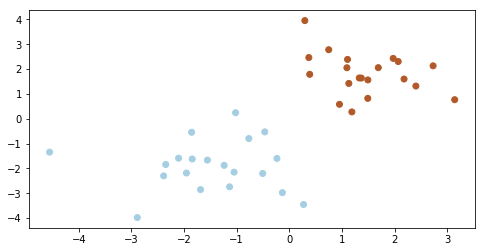

In [2]:
np.random.seed(0)  
# 生成随机的两类数据点，每类中各20个样本点
# x为样本点的横坐标，y为样本点的纵坐标
x = np.r_[np.random.randn(20,2)-[2,2],np.random.randn(20,2)+[2,2]]   
y = [0]*20+[1]*20 

# 利用plt展示随机生成的两类数据点
plt.figure(figsize=(8,4))  
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.Paired)  
plt.axis('tight')  
plt.show()

svm中的模型训练函数通过调用svm.SVC()实现，括号中有以下几种常见的参数：
* svm.SVC(kernel='linear')：核函数为线性函数
* svm.SVC(kernel='poly', degree=3)：核函数为3次多项式函数，如果degree=n，则使用的核函数是n次多项式函数
* svm.SVC()：核函数为径向基函数
* svm.SVC(kernel='sigmoid')：核函数为Sigmoid函数

这里我们观察可知，样本点线性可分，使用线性核函数即可。

In [3]:
# 训练模型，核函数为线性函数，其余参数默认
clf = svm.SVC(kernel='linear')  
# 利用训练的模型拟合数据样本点
clf.fit(x,y) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

这里需要补充一点，在sklearn拟合的线性模型$h(w, x)= w_0 + w_1 x_1 + ... + w_p x_p$中规定 $w_0$是clf.intercept_ 也即是截距. $w_1--w_p$ 是clf.coef_. 具体到这个平面二分类问题，$h(x, y)= intercept_0 + w_1 x +  w_0 y$

('W:', array([0.90230696, 0.64821811]))
('a:', -1.391980476255765)
('support_vectors_:', array([[-1.02126202,  0.2408932 ],
       [-0.46722079, -0.53064123],
       [ 0.95144703,  0.57998206]]))
('clf.coef_:', array([[0.90230696, 0.64821811]]))


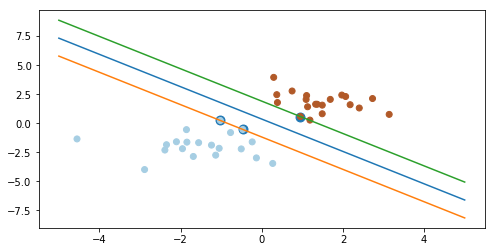

In [4]:
# 获取参数w列表
w = clf.coef_[0]  
# a为最优分类线的斜率 
a = -w[0]/w[1] 
 
# 绘制SVM分类后的效果
# xx为待绘制的分类线区间，(-5,5)之间x的值  
xx = np.linspace(-5,5) 
# yy为分类线区间上对应x的y值
# intercept_[0]/w[1]为截距
yy = a*xx-(clf.intercept_[0])/w[1] 
  
# 画出与支持向量点相切的线
# clf.support_vectors_为支持向量点的坐标
# b首先为分类线下方的一个支持向量点
b = clf.support_vectors_[0]  
# yy_down为分类线下方的支持向量点的纵坐标
yy_down = a*xx+(b[1]-a*b[0])  
# b此时为分类线上方的一个支持向量点
b = clf.support_vectors_[-1] 
# yy_up为分类线上方的支持向量点的纵坐标
yy_up = a*xx+(b[1]-a*b[0])  

# 最优分类线的w参数
print("W:",w)
# 最优分类线的斜率
print("a:",a)  

# 基于svm拟合的模型中，支持向量点的坐标
print("support_vectors_:",clf.support_vectors_)  
# 基于svm拟合的模型中，x和y的系数
print("clf.coef_:",clf.coef_)  
  
plt.figure(figsize=(8,4))  
plt.plot(xx,yy)  
plt.plot(xx,yy_down)  
plt.plot(xx,yy_up)  
plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],s=80)  
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.Paired)  
  
plt.axis('tight')  
  
plt.show()

如上图所示，蓝色线为最优分类线，基于线性核函数所拟合的模型中，支持向量点有三个，分别被橙色线穿过两个，绿色线穿过一个。

# 3 实验练习
对身高体重的数据进行svm分类，要求分别使用线性函数、三次多项式函数、径向基函数和Sigmoid函数作为核函数进行模型训练，并观察分类效果(利用plt绘制样本点，胖的样本点与瘦的样本点用颜色区分，结果绘制出分类曲线)：

In [1]:
%matplotlib inline  

import numpy as np  
import scipy as sp  
from sklearn import svm
from sklearn.model_selection import train_test_split
# 注意: 如果sklearn是0.18之前的版本，则执行下面的语句：
# from sklearn.cross_validation import train_test_split  
import matplotlib.pyplot as plt  

这里我们导入预先设置好的身高体重数据(data.txt):

In [2]:
data   = []  
labels = []  
# 读取身高体重数据集
with open("./Input/data.txt") as ifile:  
        for line in ifile:  
            tokens = line.strip().split(' ')  
            # data列表存储身高体重数据
            data.append([float(tk) for tk in tokens[:-1]]) 
            # label列表存储此人被定义为胖还是瘦
            labels.append(tokens[-1])  
# x: 以array形式存储身高体重构成的坐标
x = np.array(data)  
# labels: 将label列表array化
labels = np.array(labels)  
y = np.zeros(labels.shape) 

# y：存储0,1化的体重标签，值为0说明此人被定义为瘦，值为1说明此人定义为胖
y[labels=='fat']=1  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.0)  

In [3]:
# 建立画布（可以不用关心具体的实现过程）
h = .02    
x_min, x_max = x_train[:, 0].min() - 0.1, x_train[:, 0].max() + 0.1  
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1  
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),  
                     np.arange(y_min, y_max, h))  

**练习1：调用svm中SVC模块**

下面的代码中初始设定的SVC都是空值，根据前面的介绍，当SVC都是空值时，默认用径向基函数进行svm训练，执行下面的代码，观察径向基函数的分类效果。

**练习2：利用不同的核函数进行训练**

请根据注释在SVC括号内填入参数，使得分别实现用线性函数、1次多项式函数、径向基函数及Sigmoid函数对数据集进行拟合。

**练习3：参数调整**

调整多项式函数中的多项式次数(degree)，观察并评估四个核函数在怎样的参数下会有最好的分类效果（注：所谓的分类效果最好，即尽量实现在上方棕色区域内全为棕色点，在下方蓝色区域内全为蓝色点）

/data/anaconda3/envs/jupyterhub/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


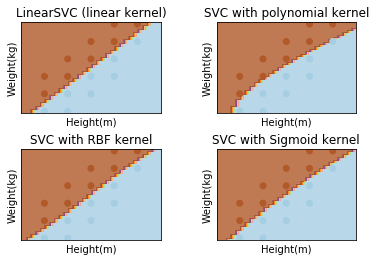

In [10]:
# 绘图名称
titles = ['LinearSVC (linear kernel)',  
          'SVC with polynomial kernel',  
          'SVC with RBF kernel',  
          'SVC with Sigmoid kernel'] 

# 建立模型并拟合数据
# 核函数为线性函数
clf_linear  = svm.SVC(kernel="linear",C=100).fit(x, y)
# 核函数为多项式函数
clf_poly    = svm.SVC(kernel="poly",degree = 2,C=20).fit(x, y)   
# 核函数为径向基函数
clf_rbf     = svm.SVC(C=1e5,gamma=1e-3).fit(x, y)  
# 核函数为Sigmoid函数
clf_sigmoid = svm.SVC(kernel="sigmoid",C=1e8,gamma=1e-6).fit(x, y)  

for i, clf in enumerate((clf_linear, clf_poly, clf_rbf, clf_sigmoid)):  
    answer = clf.predict(np.c_[xx.ravel(), yy.ravel()]) 
    plt.subplot(2, 2, i + 1)  
    plt.subplots_adjust(wspace=0.4, hspace=0.4)  
      
    # 将数据点绘制在坐标图上  
    z = answer.reshape(xx.shape)  
    plt.contourf(xx, yy, z, cmap=plt.cm.Paired, alpha=0.8)  
  
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.Paired)  
    plt.xlabel('Height(m)')  
    plt.ylabel('Weight(kg)')  
    plt.xlim(xx.min(), xx.max())  
    plt.ylim(yy.min(), yy.max())  
    plt.xticks(())  
    plt.yticks(())  
    plt.title(titles[i])  
      
plt.show()  

# 引用和参考资料列表：
1. [@手把手教你实现SVM算法](http://blog.csdn.net/alvine008/article/details/9097105)
2. [@用Python开始机器学习](http://blog.csdn.net/lsldd/article/details/41581315)
3. [@哥伦比亚大学Machine Learning课件](./References/svm.pdf)

> 哥伦比亚大学课件来源于[EdX线上课程](https://courses.edx.org/courses/course-v1:ColumbiaX+CSMM.102x+2T2017/courseware/6dc84c97c30c4a63afa097901b94b732/b71a58db662c47539238ca076371d06f/?activate_block_id=block-v1%3AColumbiaX%2BCSMM.102x%2B2T2017%2Btype%40sequential%2Bblock%40b71a58db662c47539238ca076371d06f)